# <center><font color='magenta'>**Python for DA1**</font></center>
### <center>Central European University, 2024-2025</center>
# <center>Class 5</center>

## Plotting

### Getting Data: I/O and Manipulation

Load exchange rate data from JSON.

In [1]:
import json

In [3]:
with open('currency_rates.json', 'r') as rp:
    dc_ccies = json.load(rp)

Note the difference in the methods (check JSON-part in Class 2):
- `json.loads()` **takes a string** and tries to convert it to a dictionary
- `json.load()` **loads a file** with the appropriate I/O action. (Under the hood it does use json.load() though.)

In [5]:
type(dc_ccies)

dict

In [7]:
dc_ccies.keys()

dict_keys(['Date', 'USDJPY', 'EURGBP', 'EURUSD'])

In [9]:
for key in dc_ccies.keys():
    print(key, type(dc_ccies[key]))

Date <class 'list'>
USDJPY <class 'list'>
EURGBP <class 'list'>
EURUSD <class 'list'>


#### Excercise

- Print the first ten elements of each list. 
- Find the data type of the list elements. (Elements within each of these lists are of the same data type.)

In [11]:
for key in dc_ccies.keys():
    print(key, dc_ccies[key][0:10])

for key in dc_ccies.keys():
    print(key, type(dc_ccies[key][0]))

Date [1577836800.0, 1577923200.0, 1578009600.0, 1578268800.0, 1578355200.0, 1578441600.0, 1578528000.0, 1578614400.0, 1578873600.0, 1578960000.0]
USDJPY [108.6809997559, 108.7129974365, 108.5429992676, 107.9639968872, 108.40599823, 108.0159988403, 109.03099823, 109.5070037842, 109.5660018921, 109.9919967651]
EURGBP [0.8461999893000001, 0.8465700150000001, 0.8495000005000001, 0.8532900214, 0.8499799967, 0.8505300283, 0.8478999734, 0.8499500155, 0.8521299958, 0.8573200107000001]
EURUSD [1.1220825911, 1.1220825911, 1.1171437502, 1.1161960363, 1.1197994947, 1.1154738665, 1.1113210917, 1.1111111641, 1.1116669178, 1.1135733128]
Date <class 'float'>
USDJPY <class 'float'>
EURGBP <class 'float'>
EURUSD <class 'float'>


<details><summary><b>Click here for the solution</b></summary>
 
    
```python
for key in dc_ccies.keys():
    print(key, dc_ccies[key][0:10])

for key in dc_ccies.keys():
    print(key, type(dc_ccies[key][0]))
```

</details>

The `Date` key contains UNIX timestamps. Use ***list comprehension*** to convert these timestamps to `datetime.date` objects.

In [13]:
# Some help
import datetime

x = dc_ccies['Date'][0]
print(x)
print(datetime.date.fromtimestamp(x))

1577836800.0
2020-01-01


In [ ]:
# Your solution goes here
# dc_ccies['Date'] = ...

<details><summary><b>Click here for the solution</b></summary>
 
    
```python
dc_ccies['Date'] = [datetime.date.fromtimestamp(x) for x in dc_ccies['Date']]
```

</details>

In [15]:
dc_ccies['Date'] = [datetime.date.fromtimestamp(x) for x in dc_ccies['Date']]

### Plotting with Matplotlib

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

`matplotlib` is the primary charting library of Python. It is a massive library, which offers so much, that it can easily become overwhelming. Creating a basic chart is fairly simple, but sometimes just a little customization already requires a deep dive into the API.

One of the reasons we cover matplotlib here though is that many other libraries are also built on the matplotlib API, and plotting charts directly from Pandas dataframes is easier if we have a basic understading of matplotlib's mechanics. There are other popular charting packages, such a`seaborn` n  `Plotly`  , but we think that a real Pythonista should be able to work with matplotlib objects.

A good sumary of the hows and whys of matplotlib can be found here: [https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39](https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39). 

There are two ways of creating a matplotlib plot.

**1. the functional approach**

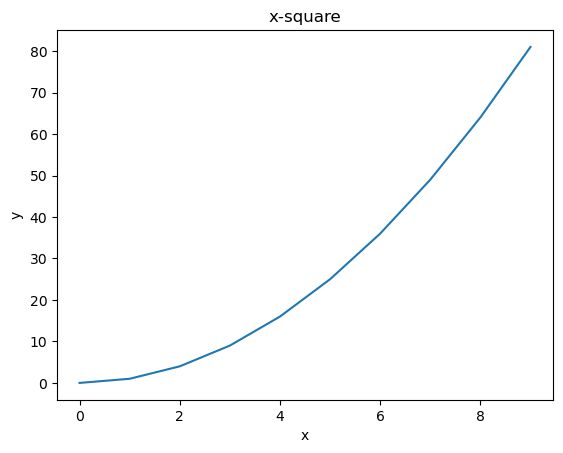

In [55]:
x = range(0, 10)
y = [i ** 2 for i in x]

plt.plot(x,y)
plt.title('x-square')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

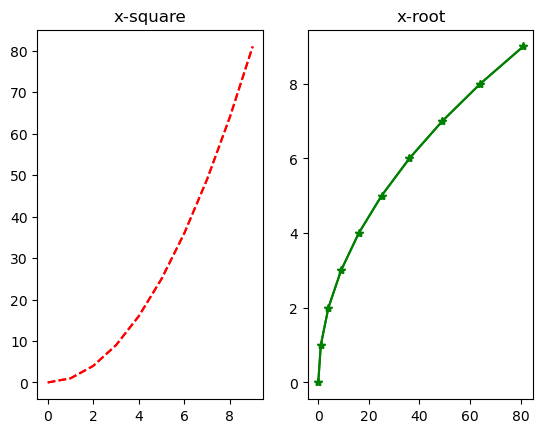

In [25]:
plt.subplot(1,2,1) # nrows, ncols, index of the next plot starting with index 1 from the top left and increasing to the right
plt.plot(x, y, 'r--') # 'r' stands for red, '--' stands for dash
plt.title('x-square')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')
plt.title('x-root')
plt.show() # insted of plt.show() you can also use a semicolon to show the plot

Matplotlib color options can be found here: [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)

**2. the object-oriented API**

There are two key components in a Plot; namely, `Figure` and `Axes`.

The `Figure` is the top-level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, or `Axes`, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

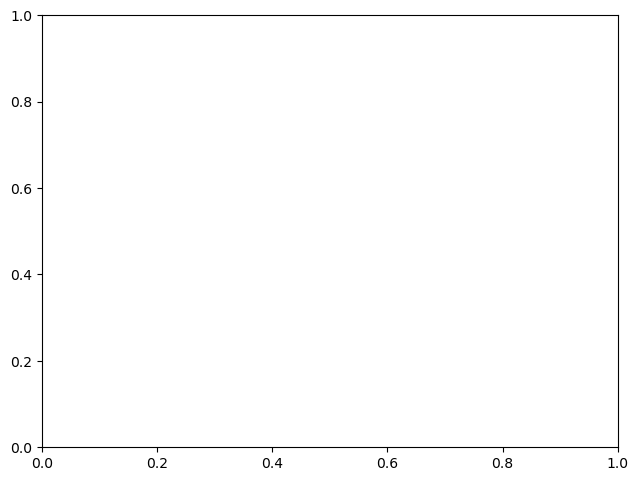

In [71]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
plt.show()

The `Axes` is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis

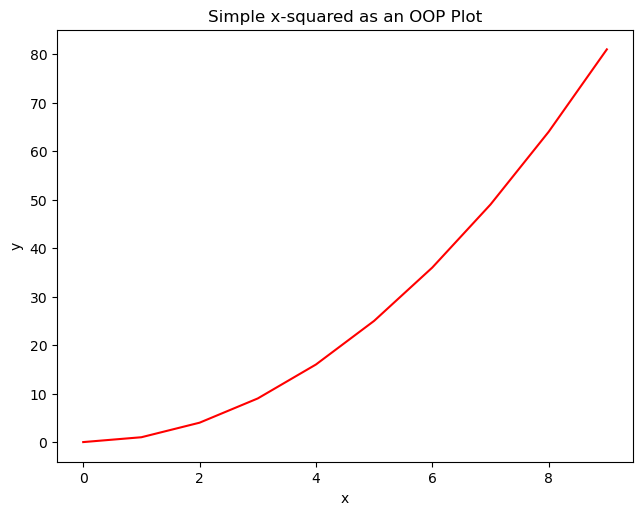

In [75]:
x = range(0, 10)
y = [i ** 2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Simple x-squared as an OOP Plot')
plt.show()

We can do a plot within a plot.

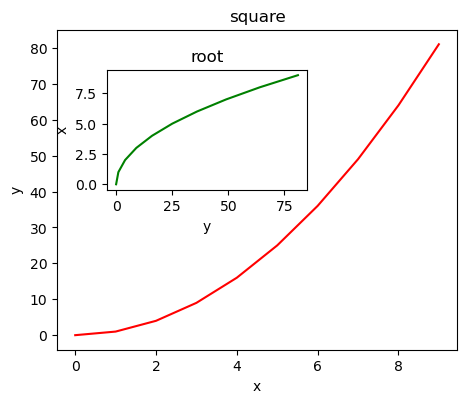

In [77]:
fig = plt.figure(figsize=(5,4)) #this is our canvas where we put the plots

axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.4, 0.4, 0.3]) # inset axes: left and bottom of the lower-left corner, width, height

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('square')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('root')
plt.show()

Charting currency movements, basic plot. 

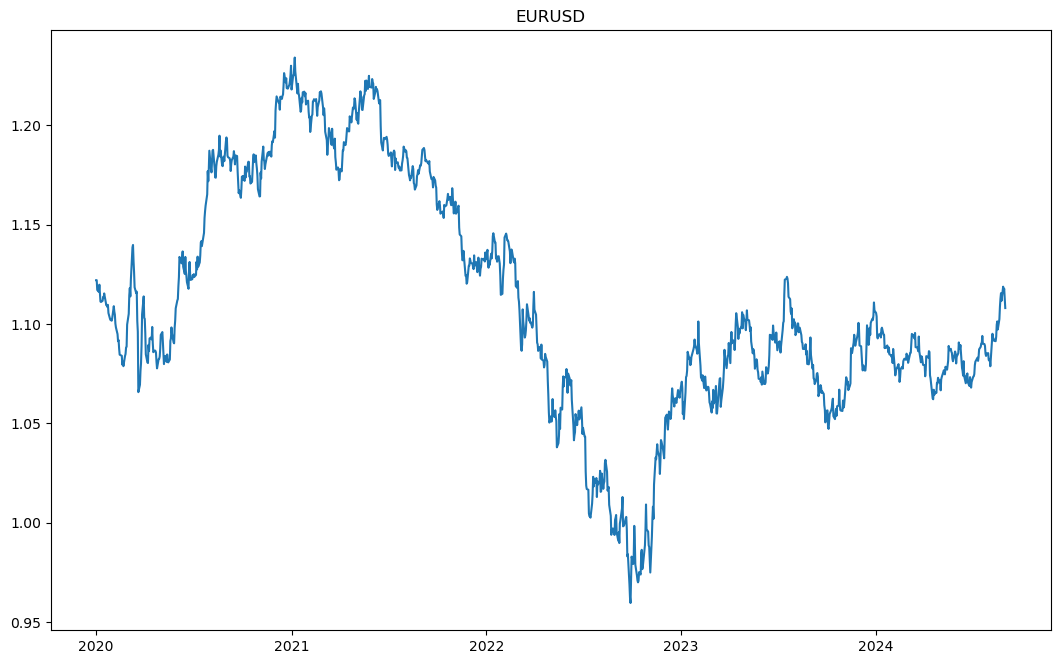

In [79]:
date = dc_ccies['Date']
fxrate = dc_ccies['EURUSD']

fig = plt.figure(figsize=(10,6)) # figsize = width, height in inches
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD')
ax.plot(date, fxrate)
ax.plot
plt.show()

Adding additional chart elements.
- y-axis limits
- legends

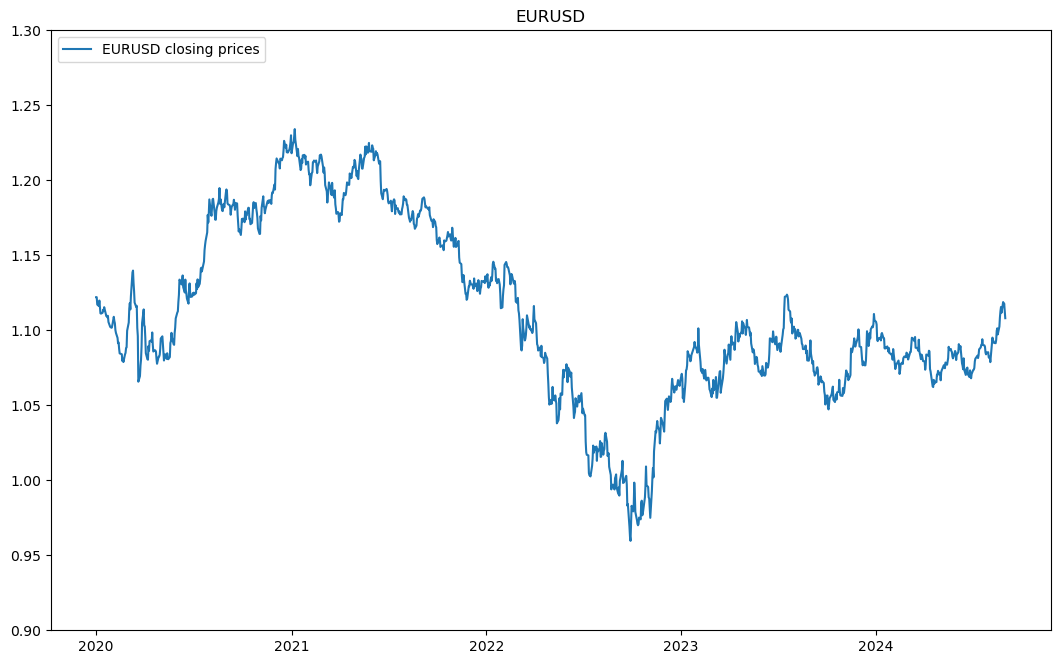

In [81]:
date = dc_ccies['Date']
fxrate = dc_ccies['EURUSD']

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD')
ax.plot(date, fxrate, label = 'EURUSD closing prices') #label adds a legend
ax.set_ylim(0.9,1.3) #Y-axis is now not automatically scaled
plt.legend(loc = 'upper left'); #set legend place
plt.show()

- average line

In [83]:
import numpy as np

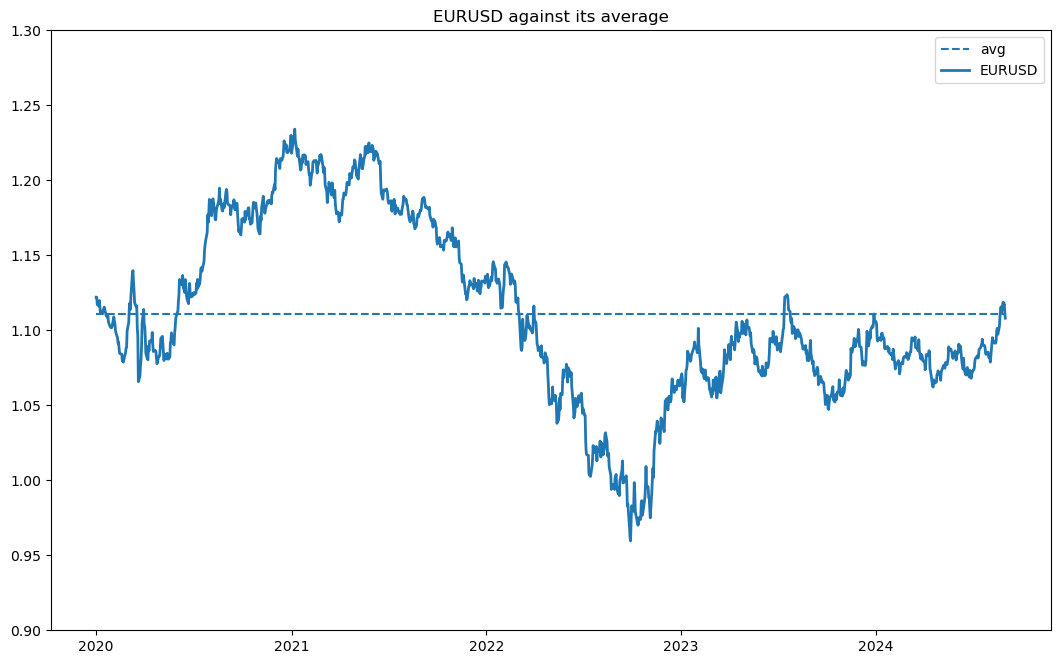

In [85]:
date = dc_ccies['Date']
fxrate = dc_ccies['EURUSD']
meanrate = np.mean(fxrate)

fig, ax = plt.subplots(figsize = (10,6)) # to add chart elements, we use the plt.subplots() method here
ax = fig.add_axes([0,0,1,1])
ax.hlines(y = meanrate, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'avg')
ax.plot(date, fxrate, label = 'EURUSD', linewidth = 2)
ax.set_ylim(0.9,1.3)
ax.set_title('EURUSD against its average')
plt.legend()
plt.show()

#### Exercise

- Plot the same graph but for the average use only the last 200 days of data and position the average line accordingly.
- The average line should be black. 

In [ ]:
# Your solution goes here

- secondary y-axis

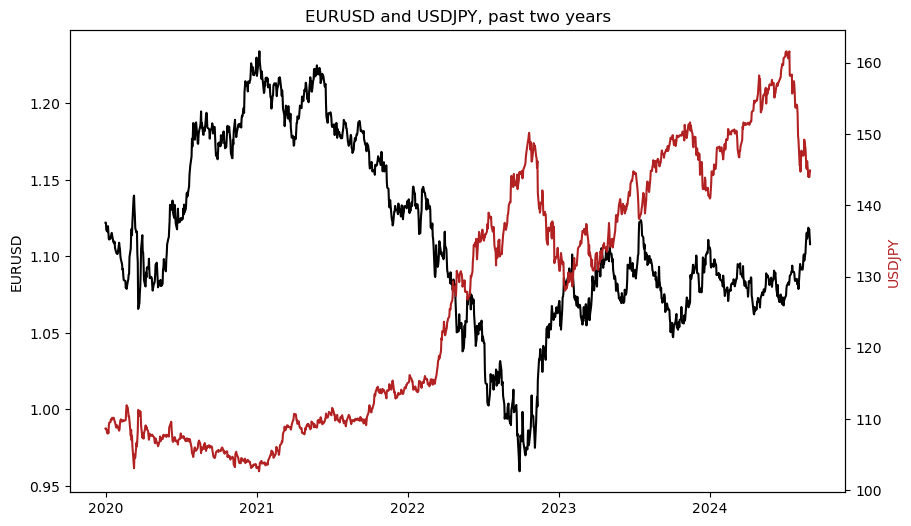

In [93]:
date = dc_ccies['Date']
eurusd = dc_ccies['EURUSD']
usdjpy = dc_ccies['USDJPY']


fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(date, eurusd, color = 'k')
ax1.xaxis_date()
ax1.set_ylabel("EURUSD", color = 'k')
ax2 = ax1.twinx() #same x axis but different y axis
ax2.plot(date, usdjpy, color = "firebrick")
ax2.set_ylabel("USDJPY", color = "firebrick")
plt.title('EURUSD and USDJPY, past two years')
plt.show()

#### Excercise

Construct a plot within a plot.
- The main plot is EURGBP for the whole period.
- The subplot is positioned on the bottom-right section of the main plot, and shows EURUSD for the last 200 days of data. 
- Add chart title, x and y axis legend for both plot elements. 

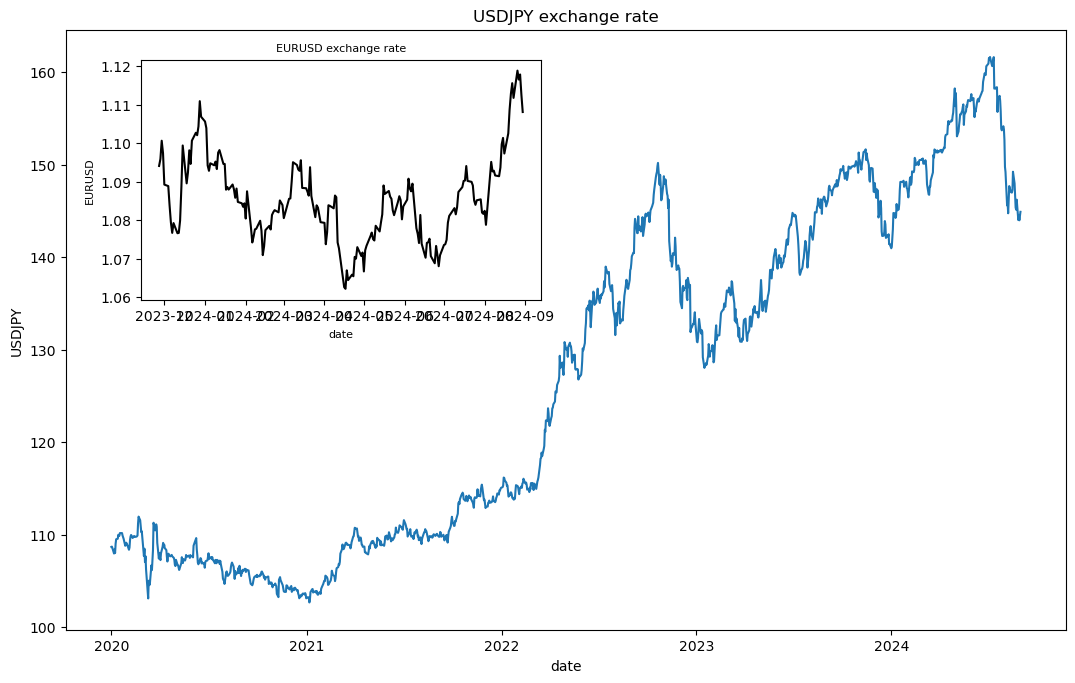

In [64]:
# Your solution goes here
date = dc_ccies['Date']
audusd = dc_ccies['USDJPY']
eurusd = dc_ccies['EURUSD']

fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.075, 0.55, 0.40, 0.4]) # inset axes

# main figure
axes1.plot(date, audusd)
axes1.set_xlabel('date')
axes1.set_ylabel('USDJPY')
axes1.set_title('USDJPY exchange rate')


# insert
axes2.plot(date[-200:], eurusd[-200:], color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('EURUSD',  fontsize = 8)
axes2.set_title('EURUSD exchange rate', fontsize = 8)
plt.show()

<details><summary><b>Click here for the solution</b></summary>
 
    
```python
date = dc_ccies['Date']
audusd = dc_ccies['USDJPY']
eurusd = dc_ccies['EURUSD']

fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.075, 0.55, 0.40, 0.4]) # inset axes

# main figure
axes1.plot(date, audusd)
axes1.set_xlabel('date')
axes1.set_ylabel('USDJPY')
axes1.set_title('USDJPY exchange rate')


# insert
axes2.plot(date[-200:], eurusd[-200:], color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('EURUSD',  fontsize = 8)
axes2.set_title('EURUSD exchange rate', fontsize = 8);
```

</details>

In [95]:
import pandas as pd

In [97]:
df = pd.DataFrame(dc_ccies)

In [99]:
df.head()

,Date,USDJPY,EURGBP,EURUSD
0,2020-01-01,108.681000,0.84620,1.122083
1,2020-01-02,108.712997,0.84657,1.122083
2,2020-01-03,108.542999,0.84950,1.117144
3,2020-01-06,107.963997,0.85329,1.116196
4,2020-01-07,108.405998,0.84998,1.119799


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1218 non-null   object 
 1   USDJPY  1218 non-null   float64
 2   EURGBP  1218 non-null   float64
 3   EURUSD  1218 non-null   float64
dtypes: float64(3), object(1)
memory usage: 38.2+ KB


#### Histograms

- histograms of daily price changes

In [103]:
df['EURUSD_pct_chg'] = df.EURUSD.pct_change(periods=1)

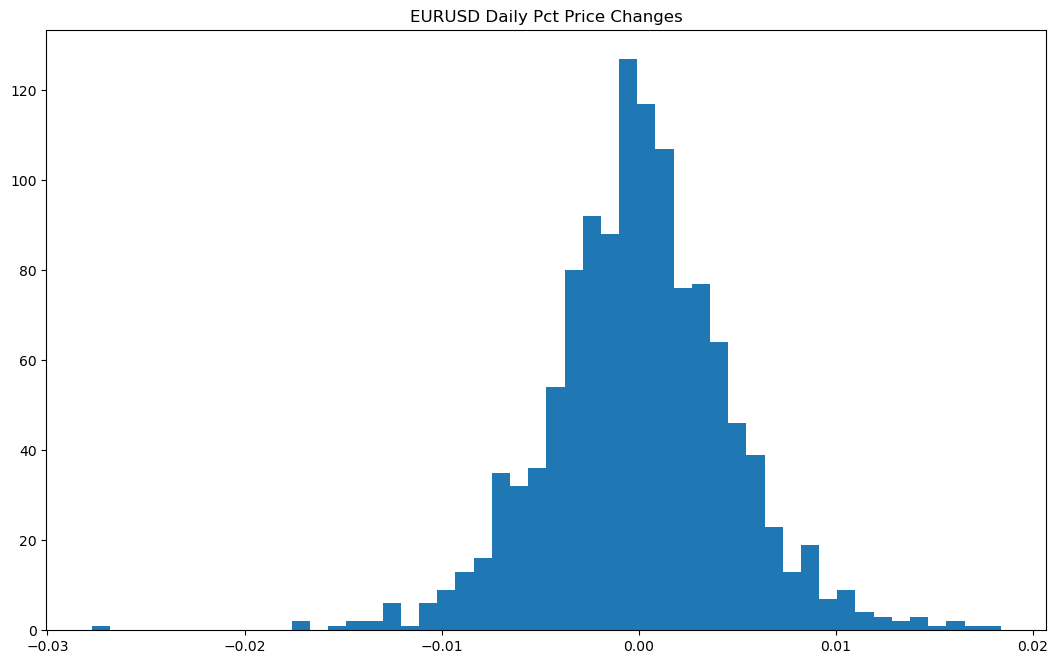

In [105]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD Daily Pct Price Changes')
ax.hist(df.EURUSD_pct_chg, bins = 50)
plt.show()

- spacing between the bars + horizontal grids

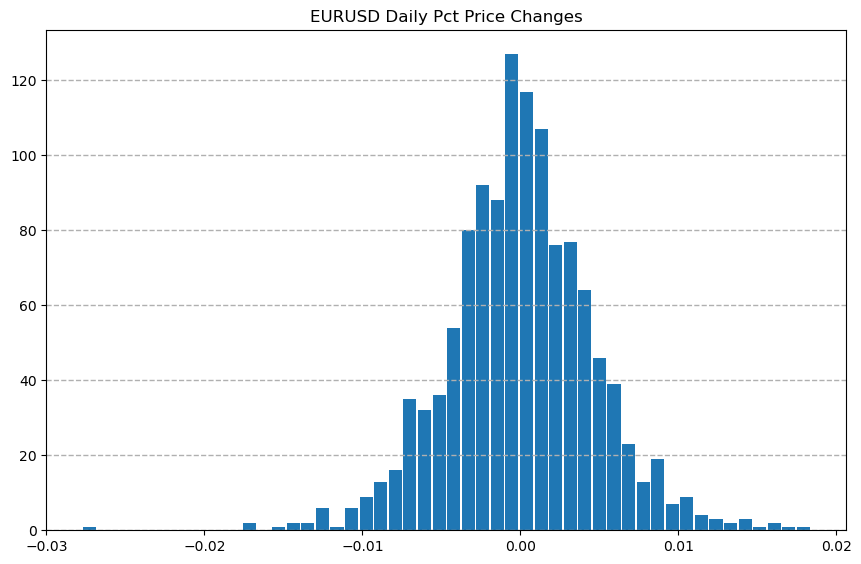

In [111]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD Daily Pct Price Changes')
ax.hist(df.EURUSD_pct_chg, bins = 50, rwidth= 0.9)
plt.grid(axis = 'y', linestyle='--', linewidth=1)
plt.show()

 - add more in-between ticks for the x-axis

In [115]:
np.linspace(-0.03, 0.02, 11)

array([-0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
        0.01 ,  0.015,  0.02 ])

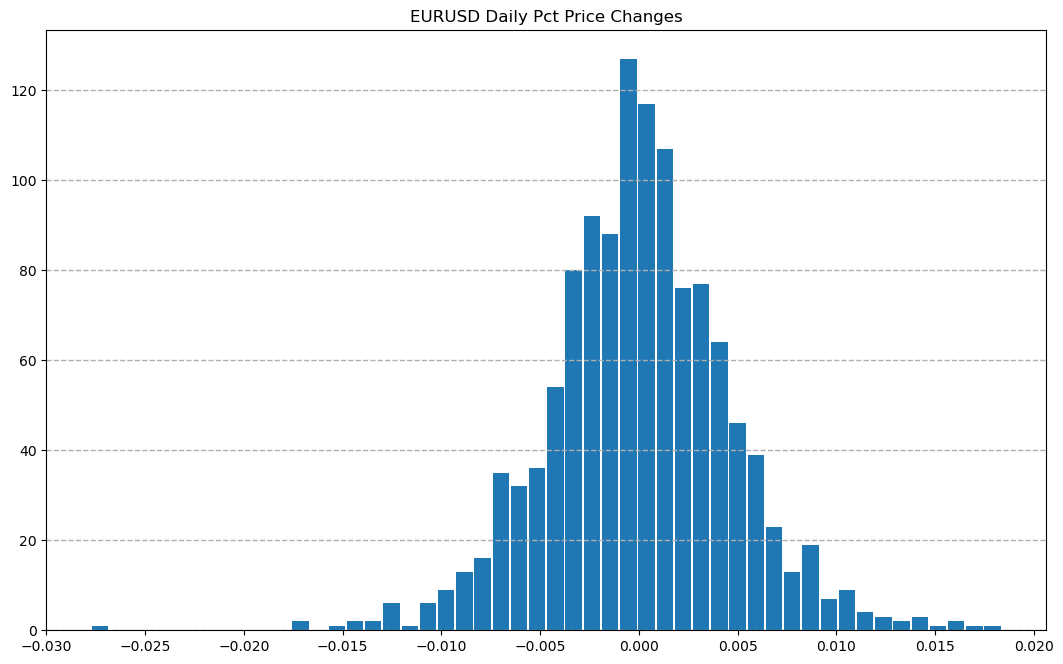

In [117]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD Daily Pct Price Changes')
ax.hist(df.EURUSD_pct_chg, bins = 50, rwidth= 0.9)
ax.set_xticks(np.linspace(-0.03, 0.02, 11))
plt.grid(axis = 'y', linestyle='--', linewidth=1)
plt.show()

- format x-axis labels as percent
- define your own bins

In [119]:
import matplotlib as mpl

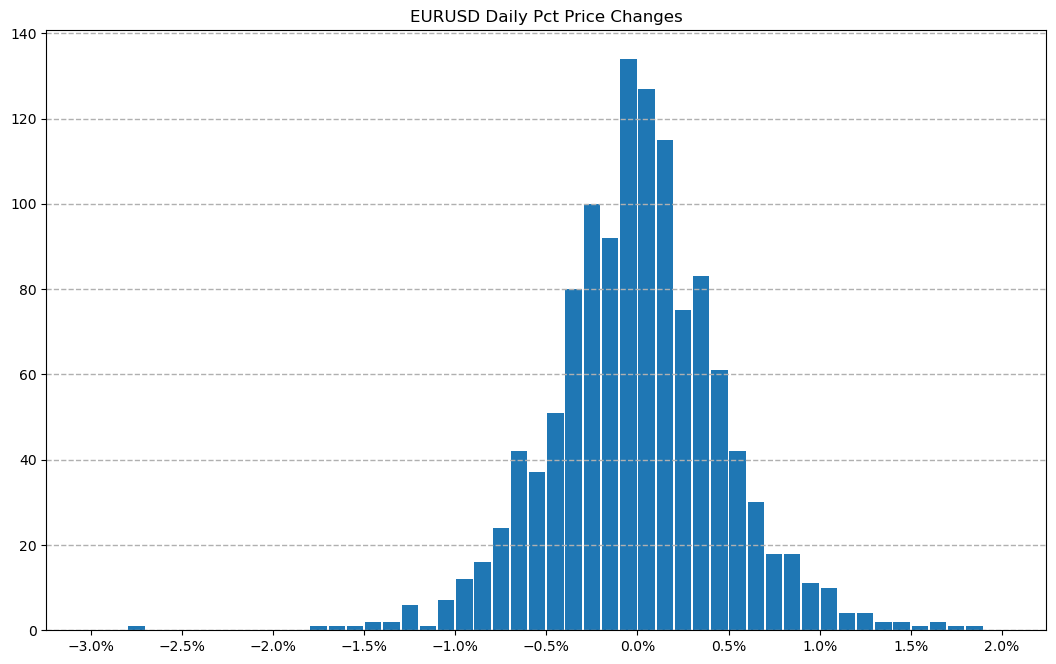

In [121]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('EURUSD Daily Pct Price Changes')
ax.hist(df.EURUSD_pct_chg, bins = np.linspace(-0.03, 0.02, 51) , rwidth= 0.9) # redefining bins
ax.set_xticks(np.linspace(-0.03, 0.02, 11))
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1.0))
plt.grid(axis = 'y', linestyle='--', linewidth=1)
plt.show()

**Analytical question** (requires domain knowledge, or some critical thinking): 
- The distribution of the price changes looks kind of normal - except for the left tail. Why do we have that extra negative number? Is it an anomaly or something inherent in the underlying `Data Generation Process`?

In [103]:
import datetime

In [105]:
datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2024-10-14 14:35:52'